In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# to read in dataset
df = pd.read_csv('C:/Users/miche/Desktop/machine_learning/bank+marketing/bank/bank-full.csv', sep=";")

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
# there are no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


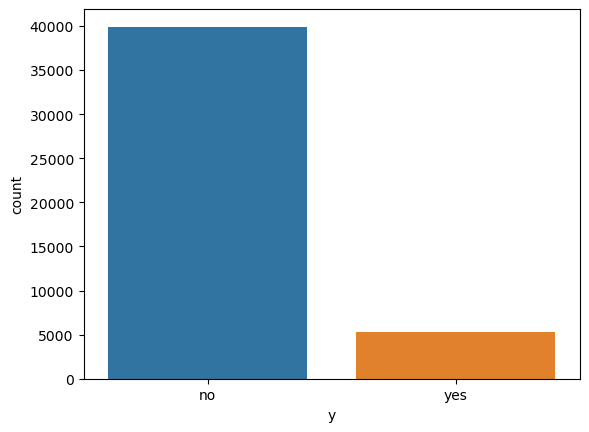

In [8]:
# to plot a countplot of target variable 'y'
# Classification problem: to predict if customers will accept the Campaign product
# 'y' = target variable is imbalanced with positive cases only 11.7%
sns.countplot(data=df, x='y');

In [10]:
# y= yes, 11.7%
df['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [11]:
# 11.7% of the customer accepted the banks's marketing campaign
100*(df['y'].value_counts()/len(df))

y
no     88.30152
yes    11.69848
Name: count, dtype: float64

In [17]:
# to use Decision Tree, Random Forest (ensemble model to do prediction)

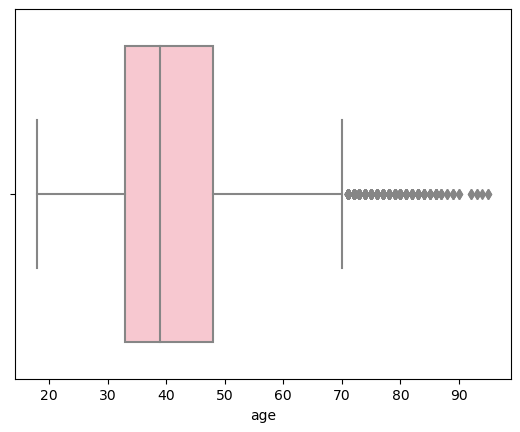

In [16]:
# understanding the characteristics of customers who had accepted the bank's Campaign Product
# the average age of bank's customer is 41 years
sns.boxplot(data=df, x='age', color='pink')
plt.show()

In [17]:
# to create new variable with recoding
def age_categories(series):
    if  18 <= series <=30:
        return "18 to 30"
    elif 31 <= series <= 45:
        return "31 to 45"
    elif 46 <= series <= 65:
        return "46 to 65"
    elif 66 <= series:
        return "above 65"

In [18]:
# to apply function for new variable in dataset
df['age categories'] = df['age'].apply(age_categories)

In [19]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age categories
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,46 to 65
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,31 to 45
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,31 to 45
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,46 to 65
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,31 to 45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,46 to 65
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,above 65
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,above 65
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,46 to 65


In [20]:
# to check the customer count for each category
df['age categories'].value_counts()

age categories
31 to 45    23733
46 to 65    13697
18 to 30     7030
above 65      751
Name: count, dtype: int64

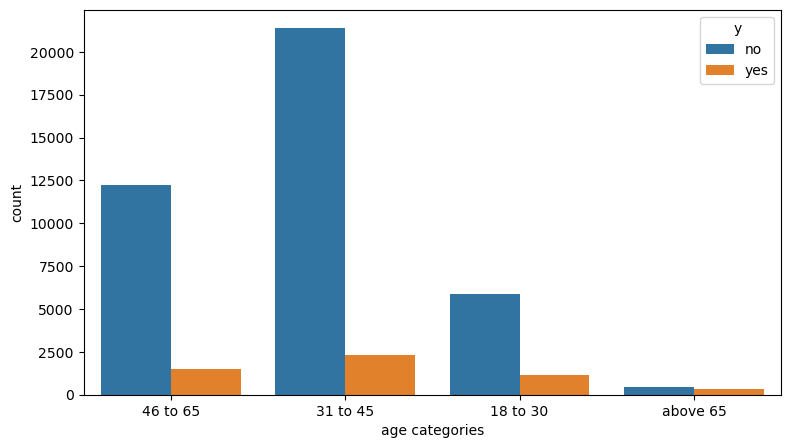

In [21]:
# to plot a graph that describes customer profiles that accepts bank's campaign product
plt.figure(figsize=(9,5), dpi=100)
sns.countplot(data=df, x='age categories', hue='y')
plt.show()

In [22]:
# from the count plot, we observed that higher numbers in age 31 to 45 years
df.groupby(['age categories','y'])['age categories'].count()

age categories  y  
18 to 30        no      5885
                yes     1145
31 to 45        no     21388
                yes     2345
46 to 65        no     12218
                yes     1479
above 65        no       431
                yes      320
Name: age categories, dtype: int64

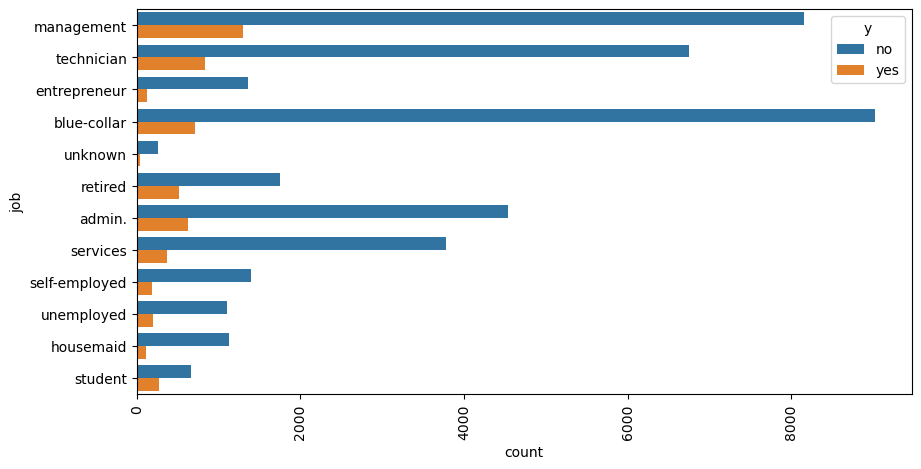

In [23]:
plt.figure(figsize=(10,5),dpi=100)
sns.countplot(data=df, y='job',hue='y')
plt.xticks(rotation=90)
plt.show()

In [24]:
# from the graph, it is observed that customers holding job in 'management','technician', 'blue-collar' 
# accept bank's Campaign product
df.groupby(['job','y'])['y'].count()

job            y  
admin.         no     4540
               yes     631
blue-collar    no     9024
               yes     708
entrepreneur   no     1364
               yes     123
housemaid      no     1131
               yes     109
management     no     8157
               yes    1301
retired        no     1748
               yes     516
self-employed  no     1392
               yes     187
services       no     3785
               yes     369
student        no      669
               yes     269
technician     no     6757
               yes     840
unemployed     no     1101
               yes     202
unknown        no      254
               yes      34
Name: y, dtype: int64

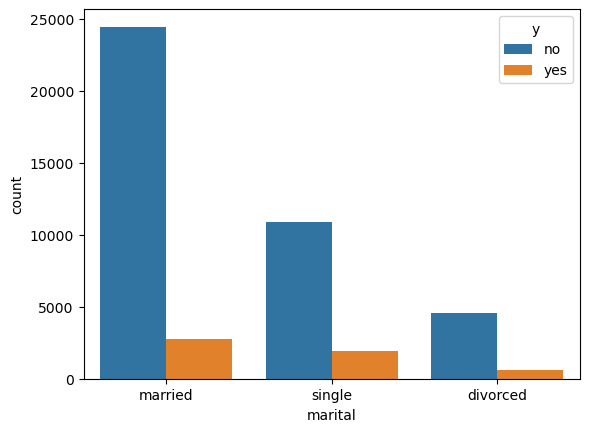

In [25]:
sns.countplot(data=df, x='marital', hue='y')
plt.show()

In [27]:
# more customers who are married or single subcribe to bank campaign product
df.groupby(['marital','y'])['y'].count()

marital   y  
divorced  no      4585
          yes      622
married   no     24459
          yes     2755
single    no     10878
          yes     1912
Name: y, dtype: int64

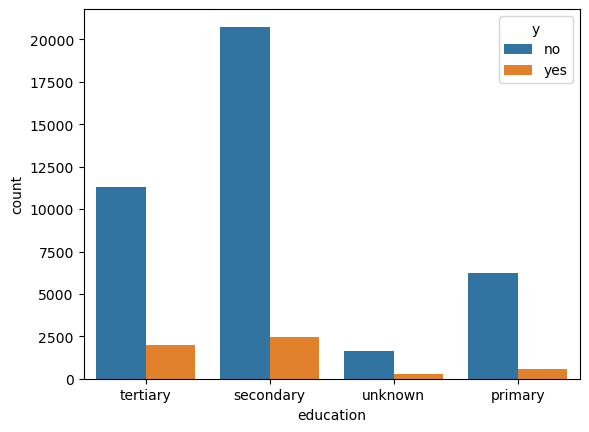

In [28]:
sns.countplot(data=df, x='education', hue='y')
plt.show()

In [29]:
# from the graph, we see that higher number of customers who have either tertiary or secondary education subscribe to product
df.groupby(['education','y'])['y'].count()

education  y  
primary    no      6260
           yes      591
secondary  no     20752
           yes     2450
tertiary   no     11305
           yes     1996
unknown    no      1605
           yes      252
Name: y, dtype: int64

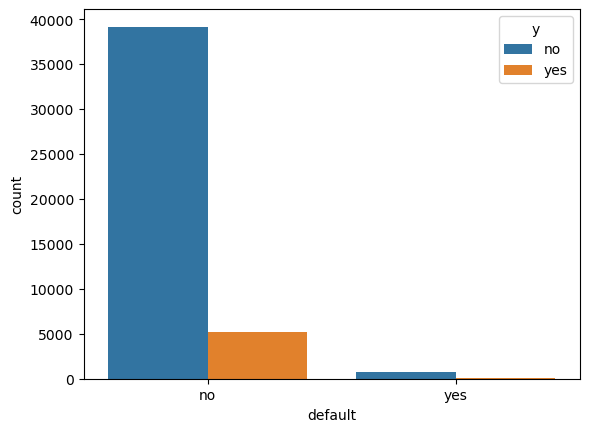

In [30]:
# graph shows that customers who subscribe did not default in their bank loan
sns.countplot(data=df, x='default', hue='y')
plt.show()

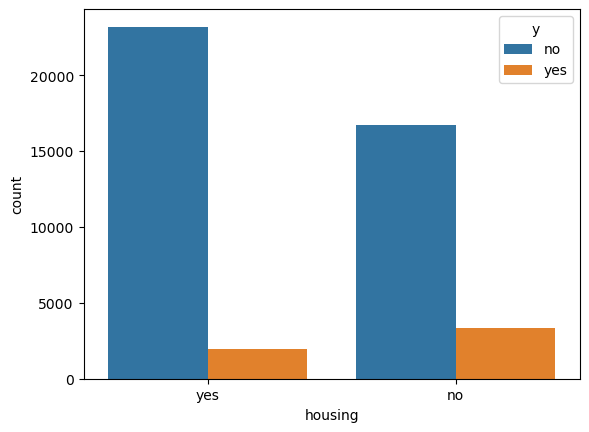

In [31]:
sns.countplot(data=df, x='housing', hue='y')
plt.show()

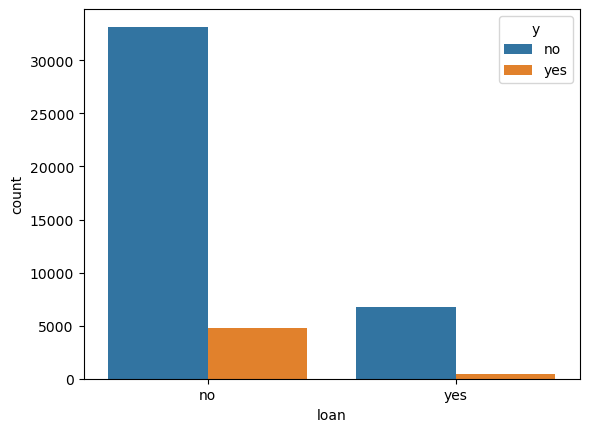

In [32]:
sns.countplot(data=df, x='loan', hue='y')
plt.show()

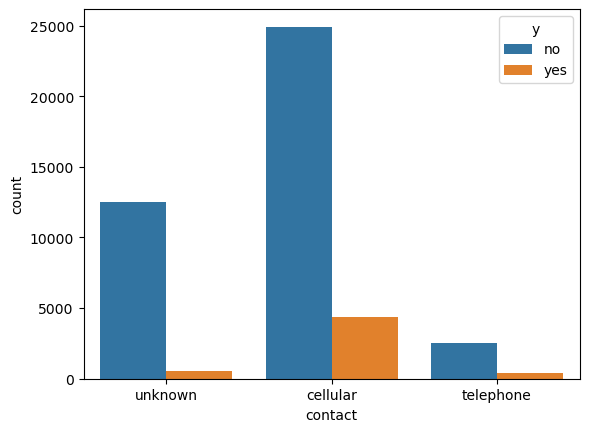

In [33]:
# customer who subscribe higher percentage is from 'Cellular'
sns.countplot(data=df, x='contact', hue='y')
plt.show()

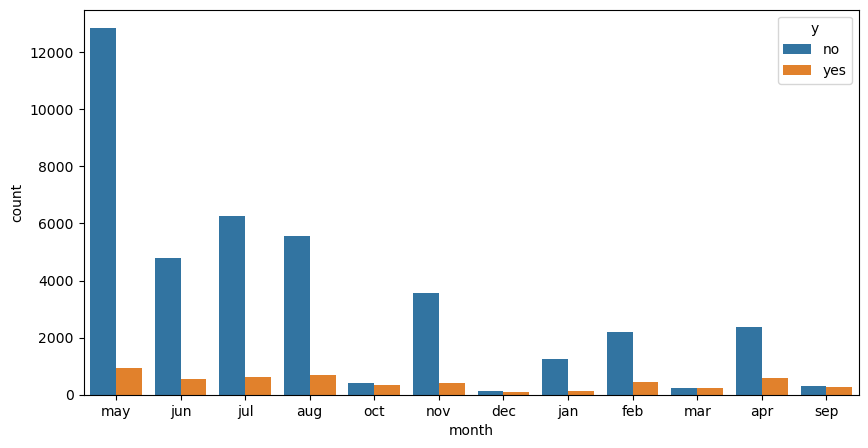

In [34]:
plt.figure(figsize=(10,5), dpi=100)
sns.countplot(data=df, x='month', hue='y')
plt.show()

In [35]:
# graphs shows highest number of subcribe to campaign product in May, Aug, Jul, apr
df.groupby(['month','y'])['y'].count()

month  y  
apr    no      2355
       yes      577
aug    no      5559
       yes      688
dec    no       114
       yes      100
feb    no      2208
       yes      441
jan    no      1261
       yes      142
jul    no      6268
       yes      627
jun    no      4795
       yes      546
mar    no       229
       yes      248
may    no     12841
       yes      925
nov    no      3567
       yes      403
oct    no       415
       yes      323
sep    no       310
       yes      269
Name: y, dtype: int64

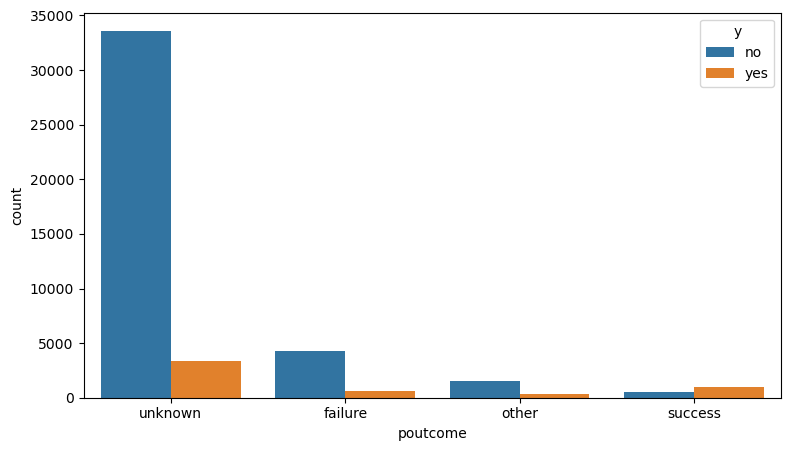

In [36]:
# poutcome: outcome of the previous marketing campaign (categorical: ‘failure’,‘nonexistent’,‘success’)
plt.figure(figsize=(9,5), dpi=100)
sns.countplot(data=df,x='poutcome', hue='y')
plt.show()

In [37]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age categories
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,46 to 65
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,31 to 45
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,31 to 45
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,46 to 65
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,31 to 45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,46 to 65
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,above 65
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,above 65
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,46 to 65


In [38]:
df = df.drop('age categories', axis=1)

In [39]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [40]:
# to convert categorical variables into dummy variables before ML al
X = pd.get_dummies(df.drop('y', axis=1), drop_first=True)

In [41]:
y = df['y']

In [42]:
# to check if categorical variable has been converted to dummy variable
X

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
1,44,29,5,151,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,33,2,5,76,1,-1,0,False,True,False,...,False,False,False,True,False,False,False,False,False,True
3,47,1506,5,92,1,-1,0,True,False,False,...,False,False,False,True,False,False,False,False,False,True
4,33,1,5,198,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,False,False,False,...,False,False,False,False,True,False,False,False,False,True
45207,71,1729,17,456,2,-1,0,False,False,False,...,False,False,False,False,True,False,False,False,False,True
45208,72,5715,17,1127,5,184,3,False,False,False,...,False,False,False,False,True,False,False,False,True,False
45209,57,668,17,508,4,-1,0,True,False,False,...,False,False,False,False,True,False,False,False,False,True


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
# to scale the dataset before machine learning algorithm
from sklearn.preprocessing import StandardScaler

In [45]:
# testing set= 30%, training set = 70%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [46]:
scaler = StandardScaler()

In [47]:
scaled_X_train = scaler.fit_transform(X_train)

In [48]:
scaled_X_test = scaler.transform(X_test)

In [49]:
# to overcome class imbalance in target variable 'y'
from imblearn.over_sampling import SMOTE

In [50]:
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions y_train dataset:  (31647,)
Number transactions y_test dataset:  (13564,)


In [52]:
# to Oversample 'y' in y set
print("Before OverSampling, counts of label 'yes': {}".format(sum(y_train=='yes')))
print("Before OverSampling, counts of label 'no': {} \n".format(sum(y_train=='no')))

Before OverSampling, counts of label 'yes': 3692
Before OverSampling, counts of label 'no': 27955 



In [53]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(scaled_X_train, y_train)

In [54]:
# to check the length of both X and y training set after Oversampling with SMOTE
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

# to resample positve cases in both  Y train and test set
print("After OverSampling, counts of label 'yes': {}".format(sum(y_train_res=='yes')))
print("After OverSampling, counts of label 'no': {}".format(sum(y_train_res=='no')))

After OverSampling, the shape of train_X: (55910, 42)
After OverSampling, the shape of train_y: (55910,) 

After OverSampling, counts of label 'yes': 27955
After OverSampling, counts of label 'no': 27955


In [55]:
# to import the decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [56]:
# to create the decision tree model
dt = DecisionTreeClassifier()

In [57]:
# to fit the decision tree model into the training data, classifier because it is a 'Yes' subscribe or did not subcribe
dt.fit(X_train_res, y_train_res)

DecisionTreeClassifier()

In [61]:
# to build the prediction model 
dt_preds = dt.predict(scaled_X_test)

In [59]:
# to print output of prediction model
pd.DataFrame(dt_preds)

,0
0,no
1,no
2,no
3,no
4,no
...,...
13559,no
13560,no
13561,no
13562,no


In [60]:
# to print variables in X
X.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [62]:
# to print a list of feature importance in distinguish customers who subscribe from the decision tree prediction model
pd.DataFrame(index=X.columns, data=dt.feature_importances_,
            columns =['Importance'])

,Importance
age,0.048022
balance,0.051924
day,0.059798
duration,0.398852
campaign,0.075393
pdays,0.016891
previous,0.010857
job_blue-collar,0.004673
job_entrepreneur,0.001943
job_housemaid,0.002084


In [63]:
# to read into a new dataframe
imp_feat= pd.DataFrame(index=X.columns, data=dt.feature_importances_,
            columns =['Importance'])

In [64]:
len(imp_feat)

42

In [65]:
# to sort the values in feature importance
imp_feat = imp_feat.sort_values('Importance')

In [66]:
# top 5 variables that can predict if customer will accept bank's campaign product:'duration',
#'balance','age','poutcome_success','day'
# Duration = Last contact duration(numeric)
imp_feat

,Importance
job_unknown,0.000396
default_yes,0.000876
month_dec,0.001309
job_unemployed,0.001552
job_retired,0.001574
poutcome_unknown,0.001786
job_self-employed,0.001814
job_entrepreneur,0.001943
job_student,0.002008
education_unknown,0.002046


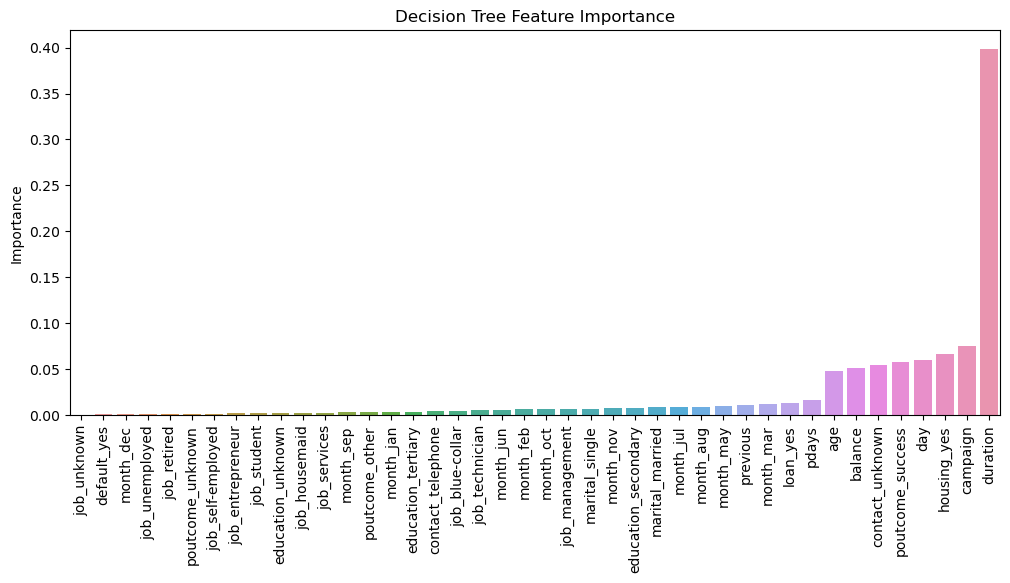

In [67]:
plt.figure(figsize=(12,5), dpi=100)
sns.barplot(data=imp_feat, x=imp_feat.index, y='Importance')
plt.title('Decision Tree Feature Importance')
plt.xticks(rotation=90)
plt.show()

In [69]:
# to import performance evaluation metrics
from sklearn.metrics import confusion_matrix,classification_report

In [70]:
confusion_matrix(y_test,dt_preds)

array([[10848,  1119],
       [  738,   859]], dtype=int64)

In [71]:
# accuracy rate of decision tree model = 86%
print(classification_report(y_test,dt_preds))

              precision    recall  f1-score   support

          no       0.94      0.91      0.92     11967
         yes       0.43      0.54      0.48      1597

    accuracy                           0.86     13564
   macro avg       0.69      0.72      0.70     13564
weighted avg       0.88      0.86      0.87     13564



In [72]:
#plot_confusion_matrix(dt,X_test,y_test)

In [73]:
# to build a Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier

In [74]:
rfc= RandomForestClassifier()

In [78]:
rfc = RandomForestClassifier(n_estimators = 100,
                            max_features = 'sqrt',
                            random_state =101)

In [79]:
# to fit the random forest classifer model to the training data
rfc.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=101)

In [80]:
rfc_pred = rfc.predict(scaled_X_test)

In [81]:
rfc_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [82]:
# the random forest model is 90% accuracy rate
print(classification_report(y_test,rfc_pred))
print('\n')
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

          no       0.94      0.94      0.94     11967
         yes       0.58      0.58      0.58      1597

    accuracy                           0.90     13564
   macro avg       0.76      0.76      0.76     13564
weighted avg       0.90      0.90      0.90     13564



[[11289   678]
 [  664   933]]


In [86]:
# to determine what are the Feature Importance of the Random Forest model
importances_rf = rfc.feature_importances_

In [87]:
X.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [88]:
rf_feat = pd.DataFrame(index=X.columns,
                      data=importances_rf,
                      columns=['Importance'])

In [89]:
rf_feat

,Importance
age,0.053204
balance,0.064624
day,0.055858
duration,0.316425
campaign,0.087092
pdays,0.021601
previous,0.025705
job_blue-collar,0.009595
job_entrepreneur,0.002075
job_housemaid,0.002030


In [90]:
# to sort feature importance in random forest model
rf_feat = rf_feat.sort_values('Importance')

In [91]:
# sorted feature importance table
rf_feat

,Importance
job_unknown,0.000576
default_yes,0.000873
month_dec,0.001252
job_housemaid,0.002030
job_entrepreneur,0.002075
job_unemployed,0.002233
poutcome_other,0.002276
job_self-employed,0.002531
education_unknown,0.002686
month_sep,0.002730


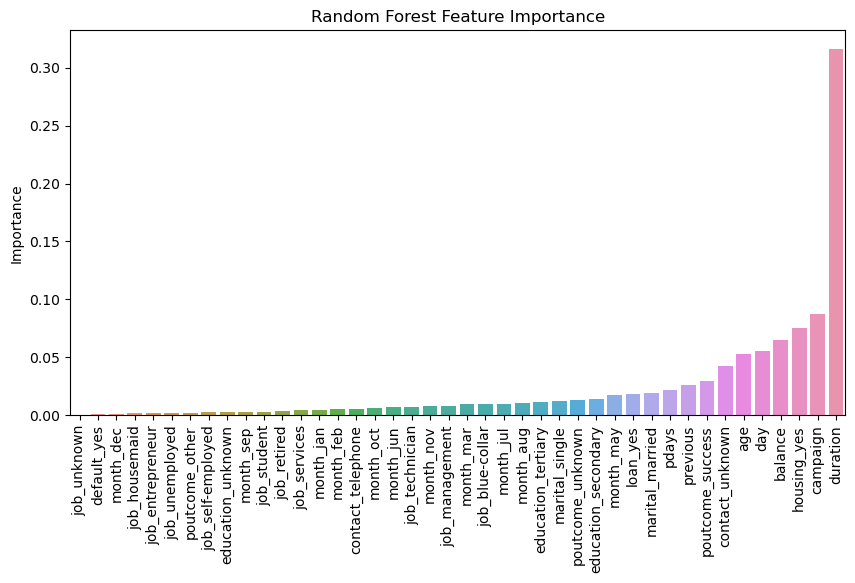

In [92]:
# RF accuracy rate = 90% (Highest Accuracy Rate)
# Top 5 predictors from Random forest model = 'duration','campaign','housing_yes'
plt.figure(figsize=(10,5), dpi=100)
sns.barplot(data=rf_feat, x =rf_feat.index, y='Importance')
plt.xticks(rotation=90);
plt.title('Random Forest Feature Importance')
plt.show()

In [93]:
# to build a Support vector classifier model
from sklearn.svm import SVC

In [94]:
# to build the Support vector classifer model
sv = SVC()

In [95]:
sv.fit(X_train_res, y_train_res)

SVC()

In [96]:
sv_pred = sv.predict(scaled_X_test)

In [97]:
print(confusion_matrix(y_test,sv_pred))
print('\n')
print(classification_report(y_test,sv_pred)) # Support Vector Classifier has 86% accuracy

[[10414  1553]
 [  327  1270]]


              precision    recall  f1-score   support

          no       0.97      0.87      0.92     11967
         yes       0.45      0.80      0.57      1597

    accuracy                           0.86     13564
   macro avg       0.71      0.83      0.75     13564
weighted avg       0.91      0.86      0.88     13564

